In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [286]:
df = pd.read_csv('/content/Crop_recommendation.csv')
df.head()

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop
0,Sanarpatti,red,75.0,50.0,100.0,6.5,1000.0,20.0,corn
1,Sanarpatti,red,80.0,50.0,100.0,6.5,1000.0,20.0,corn
2,T_Krishnapuram,red,85.0,50.0,100.0,6.5,1000.0,20.0,rice
3,T_Krishnapuram,red,90.0,50.0,100.0,6.5,1000.0,20.0,rice
4,T_Krishnapuram,red,95.0,50.0,100.0,6.5,1000.0,20.0,corn


In [287]:
df.rename(columns = {'District_Name':'village'},inplace = True)

In [288]:
df.head()

,village,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop
0,Sanarpatti,red,75.0,50.0,100.0,6.5,1000.0,20.0,corn
1,Sanarpatti,red,80.0,50.0,100.0,6.5,1000.0,20.0,corn
2,T_Krishnapuram,red,85.0,50.0,100.0,6.5,1000.0,20.0,rice
3,T_Krishnapuram,red,90.0,50.0,100.0,6.5,1000.0,20.0,rice
4,T_Krishnapuram,red,95.0,50.0,100.0,6.5,1000.0,20.0,corn


# Basic Checks

In [289]:
df.tail()

,village,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop
899,E_Perumalpatti,red,105.0,50.0,45.0,7.0,900.0,20.0,blackeyedpeas
900,E_Perumalpatti,black,110.0,50.0,45.0,7.0,900.0,20.0,blackeyedpeas
901,E_Perumalpatti,alluvial,115.0,50.0,45.0,7.0,900.0,20.0,blackeyedpeas
902,E_Perumalpatti,red,120.0,50.0,45.0,7.0,900.0,20.0,blackeyedpeas
903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   village      903 non-null    object 
 1   Soil_color   903 non-null    object 
 2   Nitrogen     903 non-null    float64
 3   Phosphorus   903 non-null    float64
 4   Potassium    903 non-null    float64
 5   pH           903 non-null    float64
 6   Rainfall     903 non-null    float64
 7   Temperature  903 non-null    float64
 8   Crop         903 non-null    object 
dtypes: float64(6), object(3)
memory usage: 63.7+ KB


In [291]:
df.shape

(904, 9)

In [292]:
df.describe()

,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature
count,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000
mean,103.986711,53.532669,57.198228,6.726467,866.334441,26.771872
std,31.294110,14.958582,19.370970,0.566466,183.573082,5.929651
min,20.000000,15.000000,20.000000,5.500000,500.000000,15.000000
25%,100.000000,45.000000,45.000000,6.500000,800.000000,25.000000
50%,110.000000,55.000000,55.000000,6.500000,900.000000,25.000000
75%,120.000000,60.000000,65.000000,7.000000,1000.000000,30.000000
max,150.000000,80.000000,115.000000,7.500000,1500.000000,35.000000


In [293]:
df.describe(include = ['O'])

,village,Soil_color,Crop
count,903,903,903
unique,41,3,11
top,Anaikaraipatti,red,corn
freq,122,554,344


# EDA

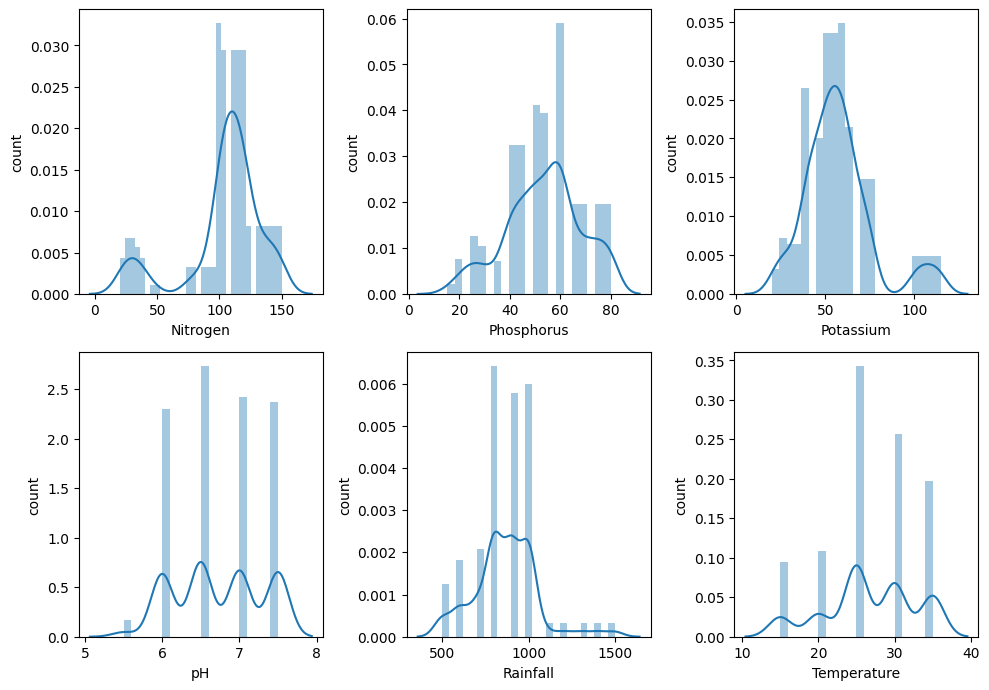

In [294]:
num = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 10))
plotnumber = 1
for nums in num:
    if plotnumber <= len(num):
        plt.subplot(3, 3, plotnumber)
        sns.distplot(df[nums].dropna(axis=0))
        plt.xlabel(nums)
        plt.ylabel('count')
        plotnumber += 1

plt.tight_layout()
plt.show()

# Insights
### check distribution: all features are non distribution.

In [295]:
df.drop(df[df['village'] == 'E_Perumalpatti'].index, inplace=True)

In [296]:
df.village.value_counts()

Anaikaraipatti            122
T_Krishnapuram             97
M_Kallupatti               76
Soolapuram                 60
Seelnaickanpatty           51
Chellayeepuram             48
M_Ayyampatti               47
Mallapuram                 44
Allamanaickanpatti         44
Thullukkuttinaickanur      41
E_Peraiyampatti            33
T_Paraipatti               32
Nagamanaickanpatti         26
Kunnuvarpatti              21
E_Perumalpatti             20
Ulaipatti                  20
Mallapuram                 18
M_S_puram                  15
P_Sangaralingapuram        13
Somasundarapuram           12
M_Ayyanarpuram              9
M_Perumalpatti              7
Pappinaickanpatty           7
Meenakshi_Moopanpatti       6
Ulaipatti                   6
Nagamanaicnpatti            4
Sanarpatti                  3
M_Sedapatti                 3
Soolapuram                  2
Nagamannayarakpatti         2
Vittilpatti                 2
Elumalai                    2
Ramasamipuram               2
M_Perumalp

In [297]:
df.village.replace(['Elumalai','Elumalai '] ,'Elumalai', inplace = True)
df.Crop.replace(['cotton','Cotton'],'cotton', inplace = True)

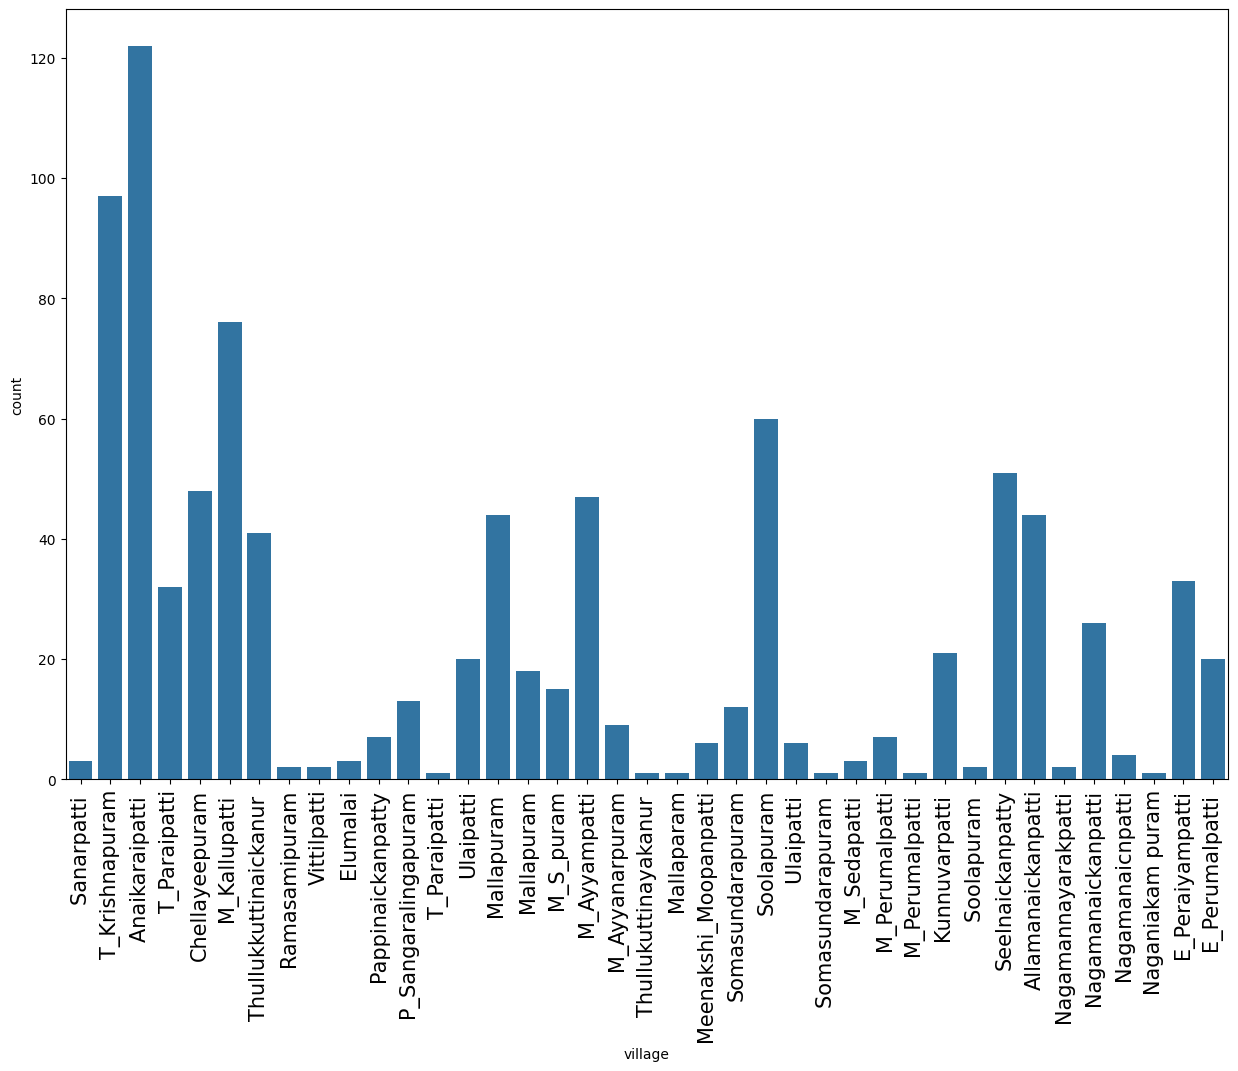

In [298]:
# Village
plt.figure(figsize = (15,10))
sns.countplot(x = 'village', data = df)
plt.xticks(fontsize = 15,rotation = 90)
plt.show()

## Insights
### Anaikaraipatti and krishanapuram is highest and Mallaparam and  t_paraipatti

In [299]:
df.Soil_color.astype('object')

0            red
1            red
2            red
3            red
4            red
         ...    
899          red
900        black
901    alluvial 
902          red
903          NaN
Name: Soil_color, Length: 903, dtype: object

In [300]:
df.Soil_color.value_counts

<bound method IndexOpsMixin.value_counts of 0            red
1            red
2            red
3            red
4            red
         ...    
899          red
900        black
901    alluvial 
902          red
903          NaN
Name: Soil_color, Length: 903, dtype: object>

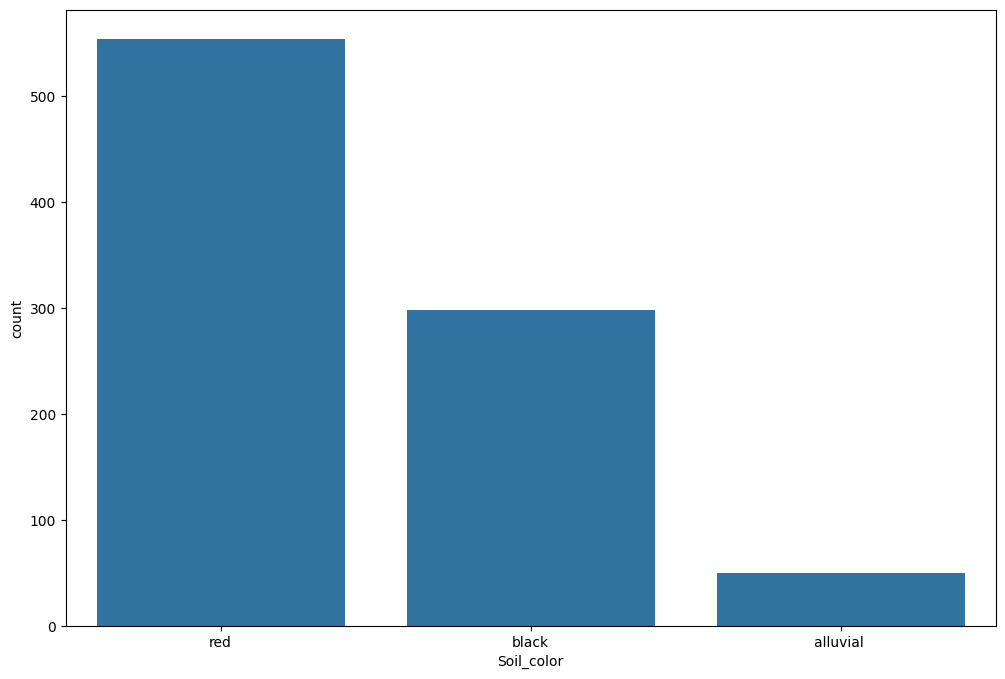

In [301]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'Soil_color',data = df)
plt.show()

## Insights
### red is more

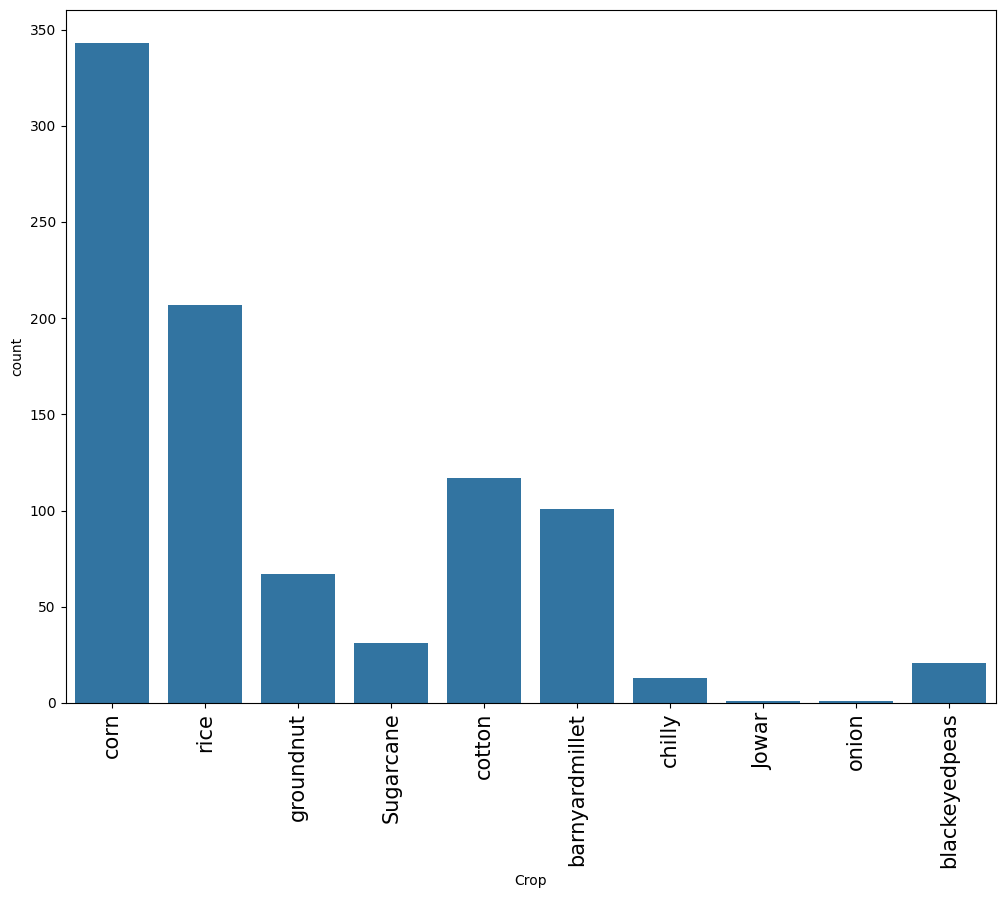

In [302]:
plt.figure(figsize = (12,9))
sns.countplot(x = 'Crop',data = df)
plt.xticks(rotation = 90, fontsize = 15)
plt.show()

## Insights
### Corn and rice is highest and jowar and onion is low

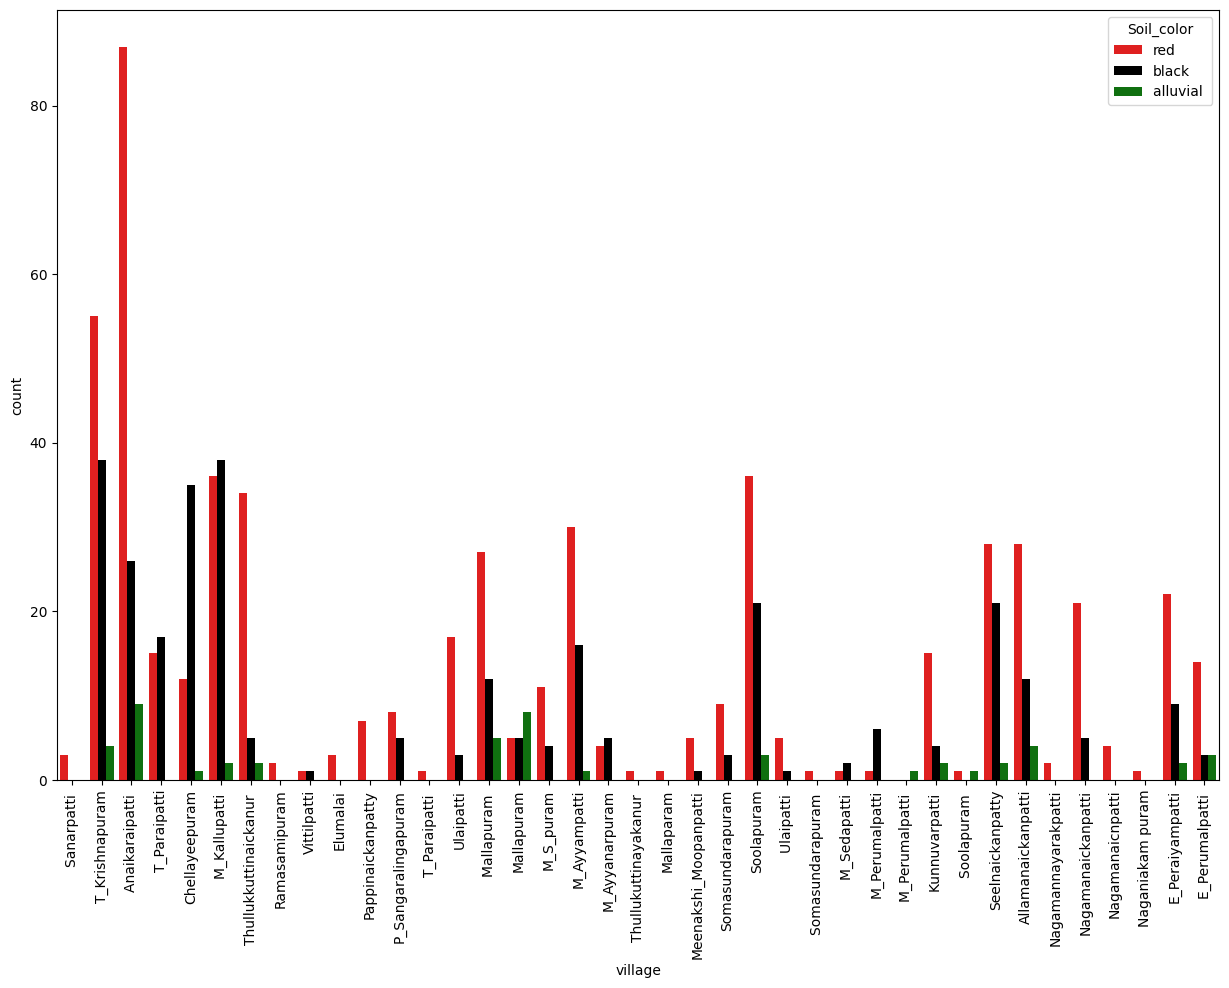

In [303]:
#village * soil
col = ('red','black','green')
plt.figure(figsize = (15,10))
sns.countplot(x = 'village',data = df,hue = 'Soil_color', palette = col)
plt.xticks(rotation = 90)
plt.show()

## Insights
### Every village red soil is more and less alluvil

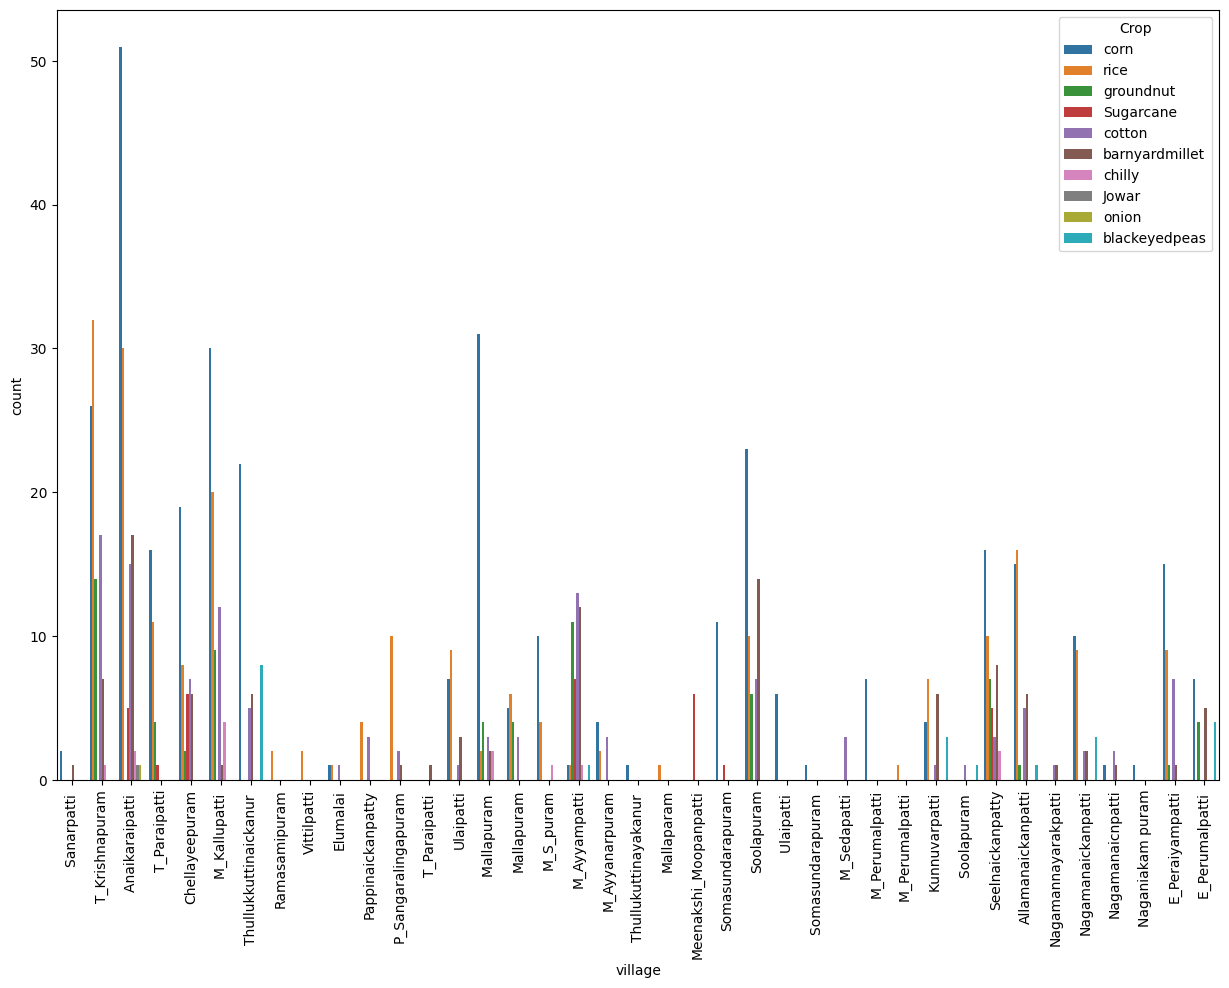

In [304]:
3#village * label
plt.figure(figsize = (15,10))
sns.countplot(x = 'village',data = df,hue = 'Crop')
plt.xticks(rotation = 90)
plt.show()

## Insights
### Every village corn is more and some villafe produce rice only, and least count is blackeyedpeans

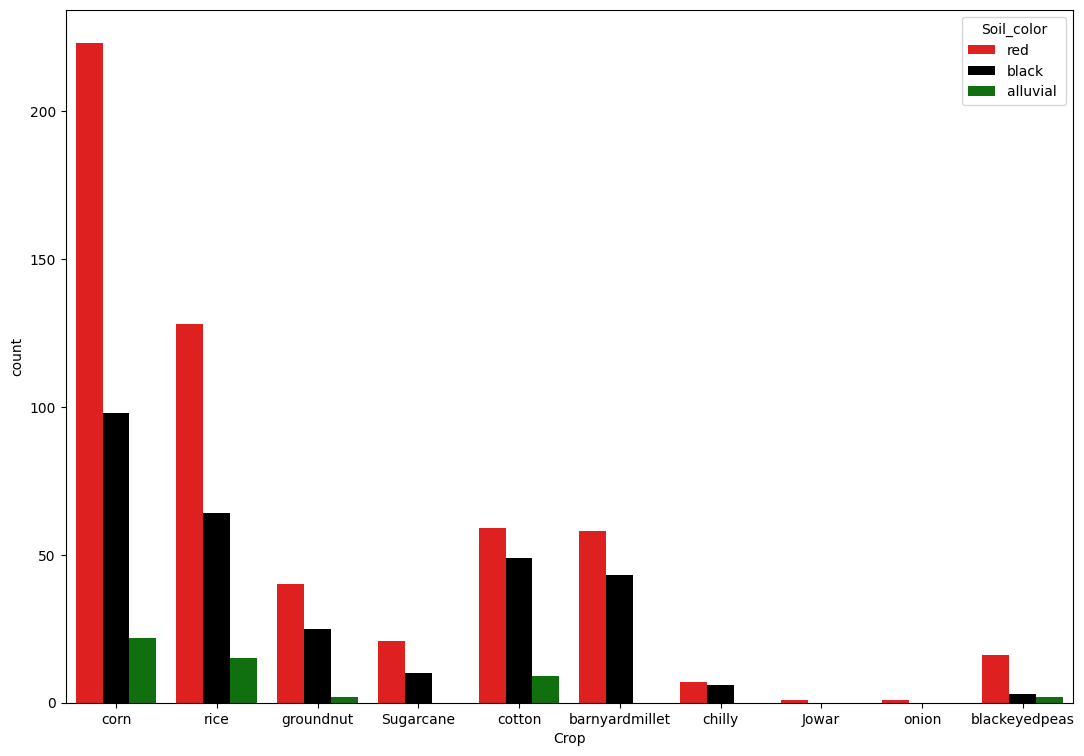

In [305]:
#soil * LAbel
color = ('red','black','green')
plt.figure(figsize = (13,9))
sns.countplot(x = 'Crop',data = df, hue = 'Soil_color', palette = color)
plt.show()

## Insights
### Every crop growth in Red soil, paricuraly corn, and alluvali is less

In [306]:
df.head(2)

,village,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop
0,Sanarpatti,red,75.0,50.0,100.0,6.5,1000.0,20.0,corn
1,Sanarpatti,red,80.0,50.0,100.0,6.5,1000.0,20.0,corn


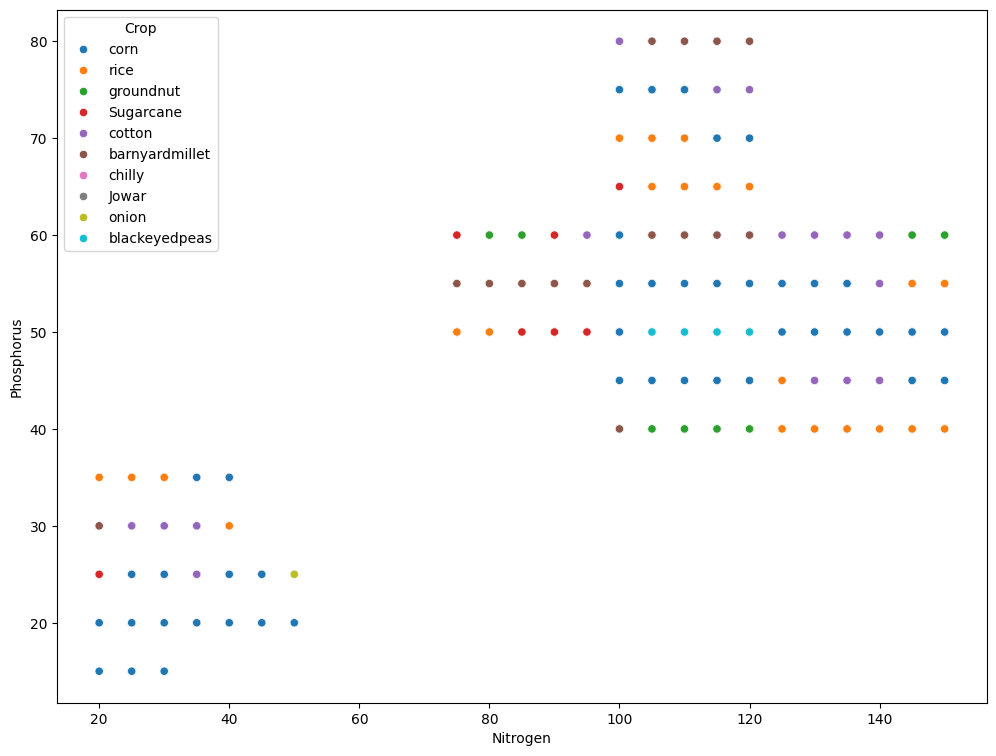

In [307]:
# Nitrogen * phosphorus
plt.figure(figsize = (12,9))
sns.scatterplot(x = 'Nitrogen',y = 'Phosphorus', data = df,hue = 'Crop')
plt.show()

## Insights barmyarmillet
### low Nitrogen and low phosphorus more corn produced , and more nitrogen and more phosphorus  producrd cotton and  barmyarmillet

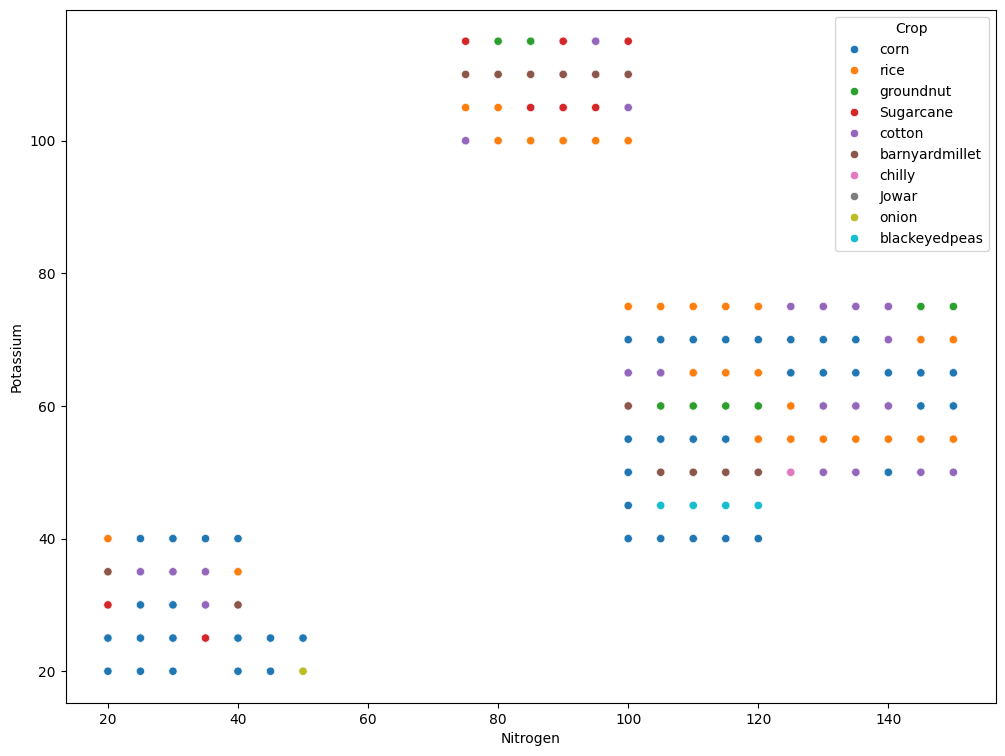

In [308]:
#Nitrogen * Potassium
plt.figure(figsize = (12,9))
sns.scatterplot(x = 'Nitrogen',y = 'Potassium', data = df,hue = 'Crop')
plt.show()

## Insights
### less nitrogen and less potassium produced more corn and high is rice

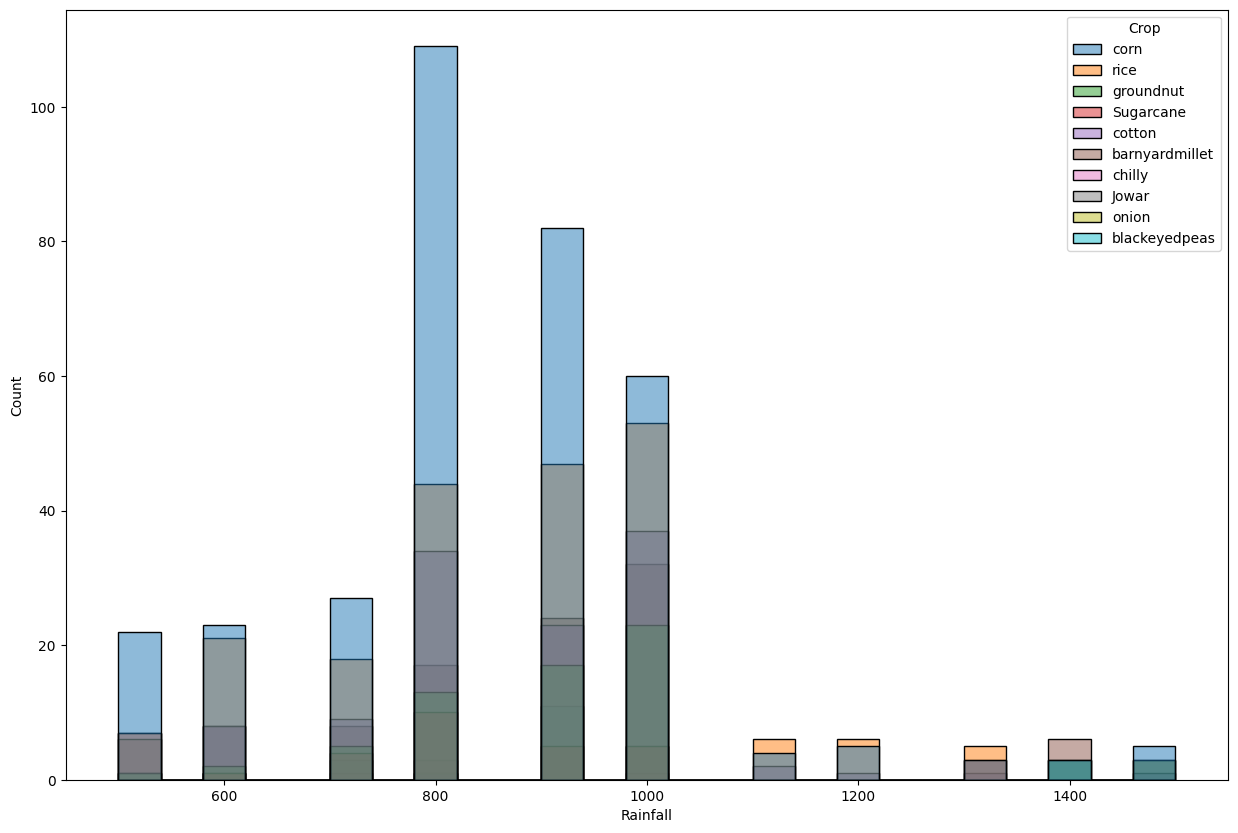

In [309]:
# label * Rainfall
plt.figure(figsize = (15,10))
sns.histplot(x = 'Rainfall', data = df,hue = 'Crop')
plt.show()


## Insights
### 100 to 1000 rainfall is due to produce cotton and jowar more but above 1000 rainfall rice and jowar and barnyardmillet is more

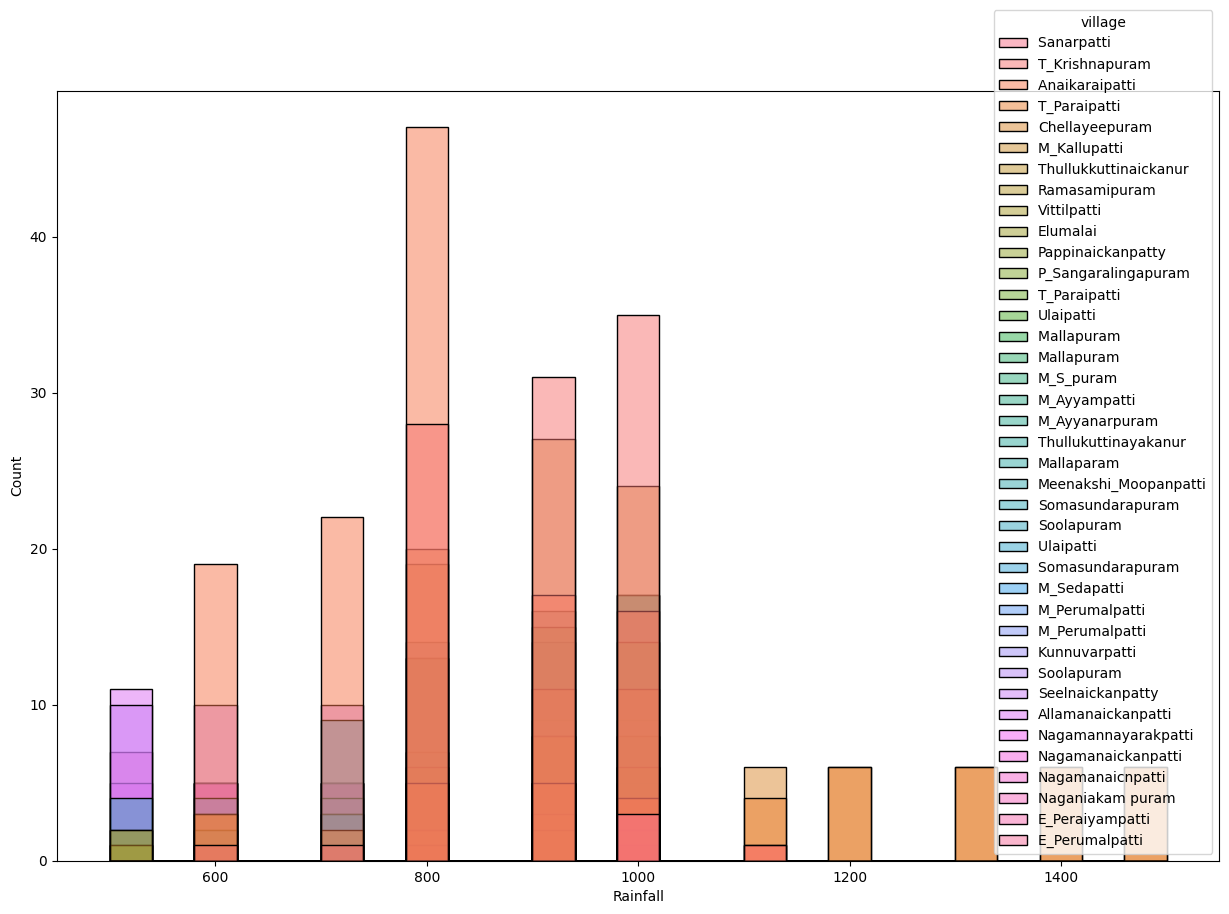

In [310]:
#village * rainfall
plt.figure(figsize = (15,10))
sns.histplot(x = 'Rainfall', data = df,hue = 'village')
plt.show()

## Insights
### more rainfall in Anaikaranpattiand saranpatti]

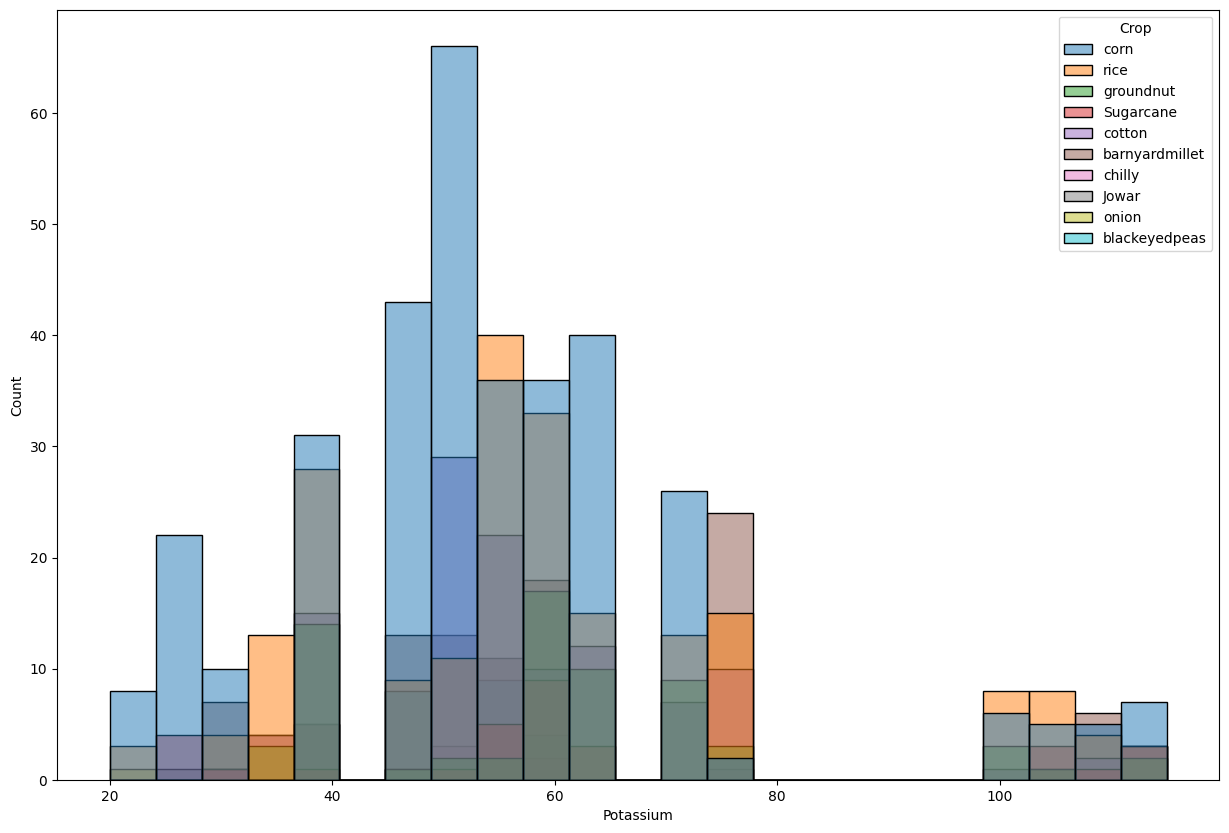

In [311]:
# Potassium * corn
plt.figure(figsize = (15,10))
sns.histplot(x = 'Potassium', data = df,hue = 'Crop')
plt.show()

## Insights
### potassium less for corn and rice more used in jowar and rice

# preprocessing

In [312]:
df.duplicated().sum()

0

In [313]:
df.isnull().sum()

village        1
Soil_color     1
Nitrogen       1
Phosphorus     1
Potassium      1
pH             1
Rainfall       1
Temperature    1
Crop           1
dtype: int64

In [314]:
df1 = df.copy()

In [315]:
df1


,village,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop
0,Sanarpatti,red,75.0,50.0,100.0,6.5,1000.0,20.0,corn
1,Sanarpatti,red,80.0,50.0,100.0,6.5,1000.0,20.0,corn
2,T_Krishnapuram,red,85.0,50.0,100.0,6.5,1000.0,20.0,rice
3,T_Krishnapuram,red,90.0,50.0,100.0,6.5,1000.0,20.0,rice
4,T_Krishnapuram,red,95.0,50.0,100.0,6.5,1000.0,20.0,corn
...,...,...,...,...,...,...,...,...,...
899,E_Perumalpatti,red,105.0,50.0,45.0,7.0,900.0,20.0,blackeyedpeas
900,E_Perumalpatti,black,110.0,50.0,45.0,7.0,900.0,20.0,blackeyedpeas
901,E_Perumalpatti,alluvial,115.0,50.0,45.0,7.0,900.0,20.0,blackeyedpeas
902,E_Perumalpatti,red,120.0,50.0,45.0,7.0,900.0,20.0,blackeyedpeas


In [316]:
df.loc[df['village'].isnull() == True,'village']

903    NaN
Name: village, dtype: object

In [317]:
df.drop(903, inplace=True)

# Encoding

In [318]:
df.Soil_color.value_counts()

red          554
black        298
alluvial      50
Name: Soil_color, dtype: int64

In [319]:
df.replace({'red':1,"black":2,"alluvial ":3},inplace = True)

In [320]:
df

,village,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop
0,Sanarpatti,1,75.0,50.0,100.0,6.5,1000.0,20.0,corn
1,Sanarpatti,1,80.0,50.0,100.0,6.5,1000.0,20.0,corn
2,T_Krishnapuram,1,85.0,50.0,100.0,6.5,1000.0,20.0,rice
3,T_Krishnapuram,1,90.0,50.0,100.0,6.5,1000.0,20.0,rice
4,T_Krishnapuram,1,95.0,50.0,100.0,6.5,1000.0,20.0,corn
...,...,...,...,...,...,...,...,...,...
898,E_Perumalpatti,1,100.0,50.0,45.0,7.0,900.0,20.0,corn
899,E_Perumalpatti,1,105.0,50.0,45.0,7.0,900.0,20.0,blackeyedpeas
900,E_Perumalpatti,2,110.0,50.0,45.0,7.0,900.0,20.0,blackeyedpeas
901,E_Perumalpatti,3,115.0,50.0,45.0,7.0,900.0,20.0,blackeyedpeas


In [321]:
df.Crop.astype('object')

0               corn
1               corn
2               rice
3               rice
4               corn
           ...      
898             corn
899    blackeyedpeas
900    blackeyedpeas
901    blackeyedpeas
902    blackeyedpeas
Name: Crop, Length: 902, dtype: object

In [322]:
df.drop(['village'],axis = 1,inplace = True)

In [323]:
df.head(2)

,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop
0,1,75.0,50.0,100.0,6.5,1000.0,20.0,corn
1,1,80.0,50.0,100.0,6.5,1000.0,20.0,corn


# split


In [324]:
x = df.drop('Crop',axis = 1)
y = df['Crop']

In [325]:
x.head()

,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature
0,1,75.0,50.0,100.0,6.5,1000.0,20.0
1,1,80.0,50.0,100.0,6.5,1000.0,20.0
2,1,85.0,50.0,100.0,6.5,1000.0,20.0
3,1,90.0,50.0,100.0,6.5,1000.0,20.0
4,1,95.0,50.0,100.0,6.5,1000.0,20.0


In [326]:
y.head()

0    corn
1    corn
2    rice
3    rice
4    corn
Name: Crop, dtype: object

In [327]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 902 entries, 0 to 902
Series name: Crop
Non-Null Count  Dtype 
--------------  ----- 
902 non-null    object
dtypes: object(1)
memory usage: 14.1+ KB


In [328]:
from sklearn.model_selection import train_test_split

In [329]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [330]:
x_train.shape

(721, 7)

In [331]:
y_test.shape

(181,)

# model ceation

In [332]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [333]:
y_pred = dc.predict(x_test)
y_pred

array(['Sugarcane', 'rice', 'rice', 'cotton', 'rice', 'corn', 'corn',
       'cotton', 'corn', 'rice', 'corn', 'corn', 'rice', 'corn',
       'groundnut', 'corn', 'cotton', 'rice', 'corn', 'groundnut', 'corn',
       'rice', 'corn', 'barnyardmillet', 'corn', 'corn', 'rice', 'rice',
       'corn', 'cotton', 'corn', 'corn', 'corn', 'barnyardmillet',
       'chilly', 'rice', 'corn', 'corn', 'barnyardmillet', 'corn',
       'barnyardmillet', 'cotton', 'corn', 'barnyardmillet', 'corn',
       'corn', 'rice', 'corn', 'corn', 'corn', 'corn', 'blackeyedpeas',
       'chilly', 'corn', 'cotton', 'corn', 'cotton', 'barnyardmillet',
       'barnyardmillet', 'rice', 'cotton', 'corn', 'cotton', 'groundnut',
       'barnyardmillet', 'barnyardmillet', 'corn', 'corn', 'corn',
       'barnyardmillet', 'corn', 'corn', 'corn', 'corn', 'corn', 'cotton',
       'corn', 'barnyardmillet', 'barnyardmillet', 'barnyardmillet',
       'corn', 'corn', 'corn', 'groundnut', 'corn', 'rice', 'corn',
       'corn', 'ri

In [334]:
c = accuracy_score(y_pred,y_test)
print('DecisionTree Accuracy score is:' + str(c))

DecisionTree Accuracy score is:0.7845303867403315


In [335]:
from sklearn.ensemble import RandomForestClassifier
n = RandomForestClassifier(random_state = 42)
n.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [336]:
x3_pred = n.predict(x_train)
x3_pred

array(['rice', 'corn', 'groundnut', 'rice', 'rice', 'corn',
       'barnyardmillet', 'rice', 'rice', 'groundnut', 'rice', 'cotton',
       'corn', 'rice', 'corn', 'corn', 'corn', 'rice', 'cotton', 'corn',
       'corn', 'cotton', 'groundnut', 'corn', 'rice', 'rice', 'chilly',
       'rice', 'blackeyedpeas', 'corn', 'corn', 'corn', 'rice',
       'Sugarcane', 'corn', 'corn', 'corn', 'corn', 'groundnut', 'corn',
       'rice', 'groundnut', 'corn', 'barnyardmillet', 'rice', 'rice',
       'corn', 'corn', 'corn', 'corn', 'cotton', 'corn', 'blackeyedpeas',
       'corn', 'cotton', 'rice', 'groundnut', 'barnyardmillet', 'cotton',
       'barnyardmillet', 'corn', 'Sugarcane', 'corn', 'corn', 'rice',
       'blackeyedpeas', 'Sugarcane', 'corn', 'Sugarcane', 'cotton',
       'corn', 'blackeyedpeas', 'corn', 'blackeyedpeas', 'cotton',
       'cotton', 'corn', 'corn', 'groundnut', 'corn', 'barnyardmillet',
       'corn', 'cotton', 'corn', 'corn', 'corn', 'corn', 'barnyardmillet',
       'corn', '

In [337]:
y3_pred = n.predict(x_test)
y3_pred

array(['Sugarcane', 'rice', 'rice', 'cotton', 'rice', 'corn', 'corn',
       'cotton', 'corn', 'rice', 'corn', 'corn', 'rice', 'corn',
       'groundnut', 'corn', 'Sugarcane', 'rice', 'corn', 'groundnut',
       'corn', 'rice', 'corn', 'barnyardmillet', 'corn', 'cotton', 'corn',
       'corn', 'corn', 'cotton', 'corn', 'corn', 'corn', 'barnyardmillet',
       'cotton', 'rice', 'corn', 'corn', 'barnyardmillet', 'cotton',
       'barnyardmillet', 'cotton', 'rice', 'barnyardmillet', 'corn',
       'corn', 'rice', 'corn', 'corn', 'corn', 'corn', 'barnyardmillet',
       'chilly', 'corn', 'cotton', 'corn', 'corn', 'cotton',
       'barnyardmillet', 'rice', 'cotton', 'corn', 'rice', 'groundnut',
       'cotton', 'barnyardmillet', 'corn', 'corn', 'corn',
       'barnyardmillet', 'corn', 'corn', 'corn', 'corn', 'corn', 'rice',
       'corn', 'corn', 'barnyardmillet', 'barnyardmillet', 'chilly',
       'corn', 'corn', 'groundnut', 'cotton', 'rice', 'corn', 'corn',
       'rice', 'rice', 'corn',

In [338]:
i2 = accuracy_score(y_test,y3_pred)
print('RandomFroest Accuracy is:' + str(i2))


RandomFroest Accuracy is:0.8232044198895028


In [339]:
df1.drop(903, inplace = True)


In [340]:
import ipywidgets as widgets
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [341]:
village = df1['village'].fillna('Unknown').unique()

# Create combo box for village
village_widget = widgets.Combobox(
    options=tuple(village),
    description='village:',
    placeholder='Select village',
    ensure_option=True
)

# Create an empty soil color widget initially
soil_color_widget = widgets.Combobox(
    description='Soil Color:',
    placeholder='Select soil color',
    ensure_option=True
)

nitrogen_widget = widgets.Combobox(
    description='Nitrogen:',
    placeholder='Select nitrogen value',
    ensure_option=True
)

phosphorus_widget = widgets.Combobox(
    description='Phosphorus:',
    placeholder='Select phosphorus value',
    ensure_option=True
)

potassium_widget = widgets.Combobox(
    description='Potassium:',
    placeholder='Select potassium value',
    ensure_option=True
)

ph_widget = widgets.Combobox(
    description='pH:',
    placeholder='Select pH value',
    ensure_option=True
)

rainfall_widget = widgets.Combobox(
    description='Rainfall:',
    placeholder='Select rainfall value',
    ensure_option=True
)

temperature_widget = widgets.Combobox(
    description='Temperature:',
    placeholder='Select temperature value',
    ensure_option=True
)

recommend_widget = widgets.Output()

# Train the model
def train_model(change):
    # Get the selected values from the combo boxes
    village = village_widget.value
    soil_color = soil_color_widget.value
    nitrogen = float(nitrogen_widget.value)
    phosphorus = float(phosphorus_widget.value)
    potassium = float(potassium_widget.value)
    pH = float(ph_widget.value)
    rainfall = float(rainfall_widget.value)
    temperature = float(temperature_widget.value)

    input_data = pd.DataFrame(
        [[nitrogen, phosphorus, potassium, pH, rainfall, temperature, village, soil_color]],
        columns=['Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature', 'village', 'Soil_color']
    )

    # Perform one-hot encoding for village and Soil_color columns
    encoder = OneHotEncoder(handle_unknown='ignore')
    X_encoded = encoder.fit_transform(df1[['village', 'Soil_color']])
    input_data_encoded = encoder.transform(input_data[['village', 'Soil_color']])

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, df1['Crop'], test_size=0.2, random_state=42)

    # Train the random forest model
    model_crop = RandomForestClassifier(n_estimators=100, random_state=42)
    model_crop.fit(X_train, y_train)

    # Make predictions
    predicted_crop = model_crop.predict(input_data_encoded)

    with recommend_widget:
        recommend_widget.clear_output()
        print("Recommended Crop:", predicted_crop[0])

# Define the observer functions to update options
def update_soil_color_options(change):
    village = change.new
    if village:
        soil_colors = df1[df1['village'] == village]['Soil_color'].unique()
        soil_color_widget.options = tuple(soil_colors)
    else:
        soil_color_widget.options = ()

def update_nutrient_options(change):
    village = village_widget.value
    soil_color = soil_color_widget.value
    if village and soil_color:
        nutrient_values = df[(df1['village'] == village) & (df1['Soil_color'] == soil_color)][['Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature']].iloc[0].astype(str).tolist()
        nitrogen_widget.options = tuple([nutrient_values[0]])
        phosphorus_widget.options = tuple([nutrient_values[1]])
        potassium_widget.options = tuple([nutrient_values[2]])
        ph_widget.options = tuple([nutrient_values[3]])
        rainfall_widget.options = tuple([nutrient_values[4]])
        temperature_widget.options = tuple([nutrient_values[5]])
    else:
        nitrogen_widget.options = ()
        phosphorus_widget.options = ()
        potassium_widget.options = ()
        ph_widget.options = ()
        rainfall_widget.options = ()
        temperature_widget.options = ()

# Observe changes in village and soil color widgets
village_widget.observe(update_soil_color_options, names='value')
village_widget.observe(update_nutrient_options, names='value')
soil_color_widget.observe(update_nutrient_options, names='value')

# Create the button widget
button = widgets.Button(description='Train Model')
button.on_click(train_model)

# Display the widgets
widgets.VBox([village_widget, soil_color_widget, nitrogen_widget, phosphorus_widget, potassium_widget, ph_widget, rainfall_widget, temperature_widget, button, recommend_widget])
